In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

## Percobaan 1

#### a. Membaca dan menampilkan gambar Lena

In [2]:
image = cv2.imread("C:/Users/user/Downloads/lena.png")
cv2.imshow("Lena", image)
cv2.waitKey(0)

-1

#### b. Mencari ukuran dan matriks dari gambar Lena

In [ ]:
print("Ukuran Gambar", image.shape)
print("Matriks dari gambar pada baris 0 dan kolom 0: ", image[0,0])

Ukuran Gambar (512, 512, 3)
Matriks dari gambar pada baris 0 dan kolom 0:  [125 137 226]


#### Melakukan pemisahan channel dan menampilkan warna dengan channel yang dipilih

In [3]:
(blue, green, red) = cv2.split(image)
cv2.imshow("Biru", blue)
cv2.waitKey(0)

-1

In [4]:
zeroMatrix = np.zeros(image.shape[:2], image.dtype)
m = zeroMatrix
blue = cv2.merge([blue, m, m])
cv2.imshow("Biru", blue)
cv2.waitKey(0)

-1

## Tugas 1

#### a. Modifikasi kode bagian (a) agar dapat menampilkan citra ‘Lenna.png’ dalam grayscale

In [5]:
image = cv2.imread("C:/Users/user/Downloads/lena.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Lena",gray_image)
cv2.waitKey(0)

-1

#### b. Modifikasi kode bagian (a) agar bisa melakukan crop pada citra ‘Lenna.png’

In [6]:
cropped_image = image[0:300, 0:200]
cv2.imshow("Lena",cropped_image)
cv2.waitKey(0)

-1

#### c. Modifikasi kode bagian (b) agar dapat menampilkan ukuran citra grayscale dari‘Lenna.png’ dan nilai matriks dari citra grayscale ‘Lenna.pg’ pada baris ke-0 dan kolom ke-0. Apakah hasilnya berbeda dengan bagian (b), jelaskan alasannya.

In [8]:
print("Ukuran Gambar", gray_image.shape)
print("Matriks dari gambar pada baris 0 dan kolom 0: ", gray_image[0,0])

Ukuran Gambar (512, 512)
Matriks dari gambar pada baris 0 dan kolom 0:  162


#### d. Modifikasi kode bagian (c) untuk menampilkan channel Green dan Red.

In [8]:
zeroMatrix = np.zeros(image.shape[:2], image.dtype)
m = zeroMatrix
green_red = cv2.merge([m, green, red])
cv2.imshow("Ijo_merah", green_red)
cv2.waitKey(0)

-1

#### e. Simpanlah file ‘Lenna.png’ menjadi format JPEG dengan menggunakan method imwrite pada OpenCV, apakah terdapat perbedaan nilai array pada file citra asli dan file dengan format JPEG? Jelaskan alasannya.

In [ ]:
cv2.imwrite("Lena.jpeg", green_red)

## Percobaan 2

#### a. Membuat sinyal gelombang

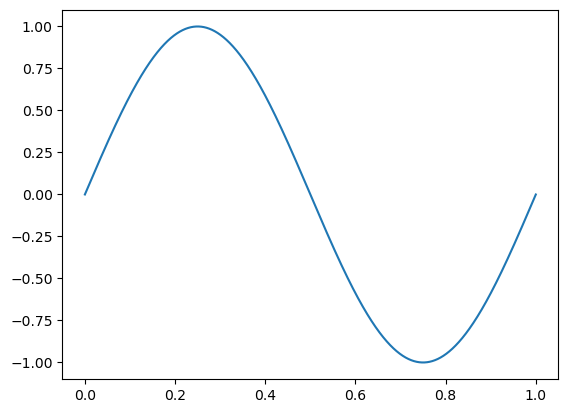

In [13]:
# Menentukan sampling rate
sr = 44100
# Menentukan frequency
freq = 1
# Menentukan length/panjang
length = 1

#membuat fungsi linear dari 0 s/d time dengan titik berjumlah sr
#1/sr --> stepsize, karena kita mau ada sr titik per detik
t = np.arange(0, length, 1.0/sr) 

#membuat wave dengan sin function wave = A*sin(2*pi*freq*t)
signal = np.sin(np.pi*2*freq*t)

#range 1 cycle dalam 1 detik, range 1 sd -1, starting point 0
plt.plot(t, signal)
plt.show()

wavfile.write("file.wav", sr, signal)

#### b. Mengganti frekuensi agar bisa didengar manusia

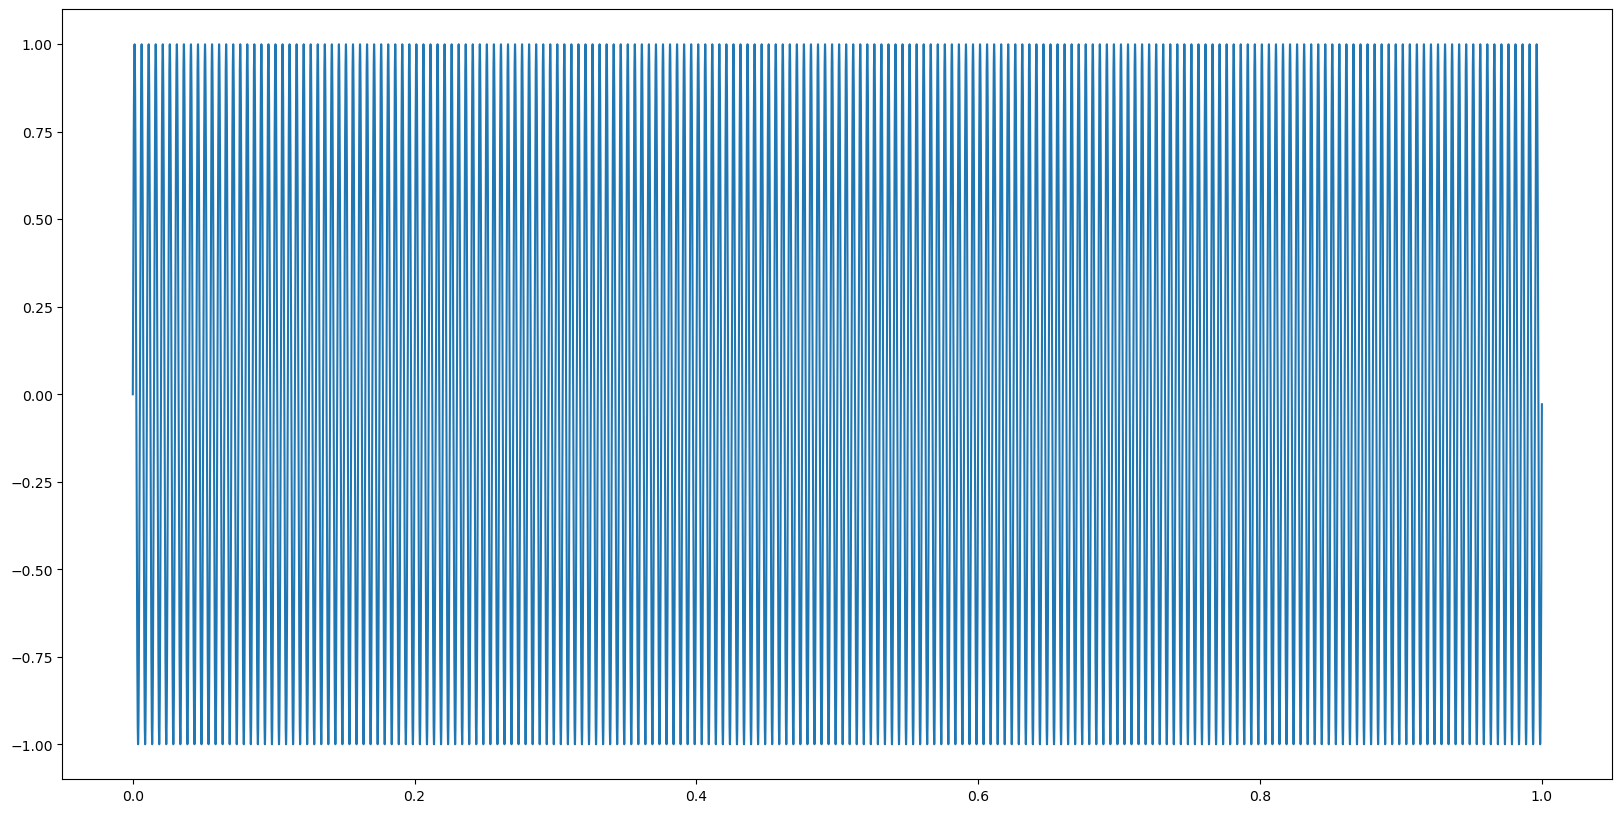

In [19]:
freq = 200
signal = np.sin(np.pi*2*freq*t)
plt.figure(figsize=(20, 10))
plt.plot(t, signal)
plt.show()
wavfile.write("file1.wav", sr, signal)

## Tugas Praktikum 2

#### Modifikasi kode bagian (a) agar membuat gelombang suara dengan frekuensi 400. Berapa panjang gelombangnya sekarang? Apakah file suara yang dihasilkan frekuensi 400 berbeda dengan file suara yang dihasilkan kode bagian (b)? jelaskan alasannya

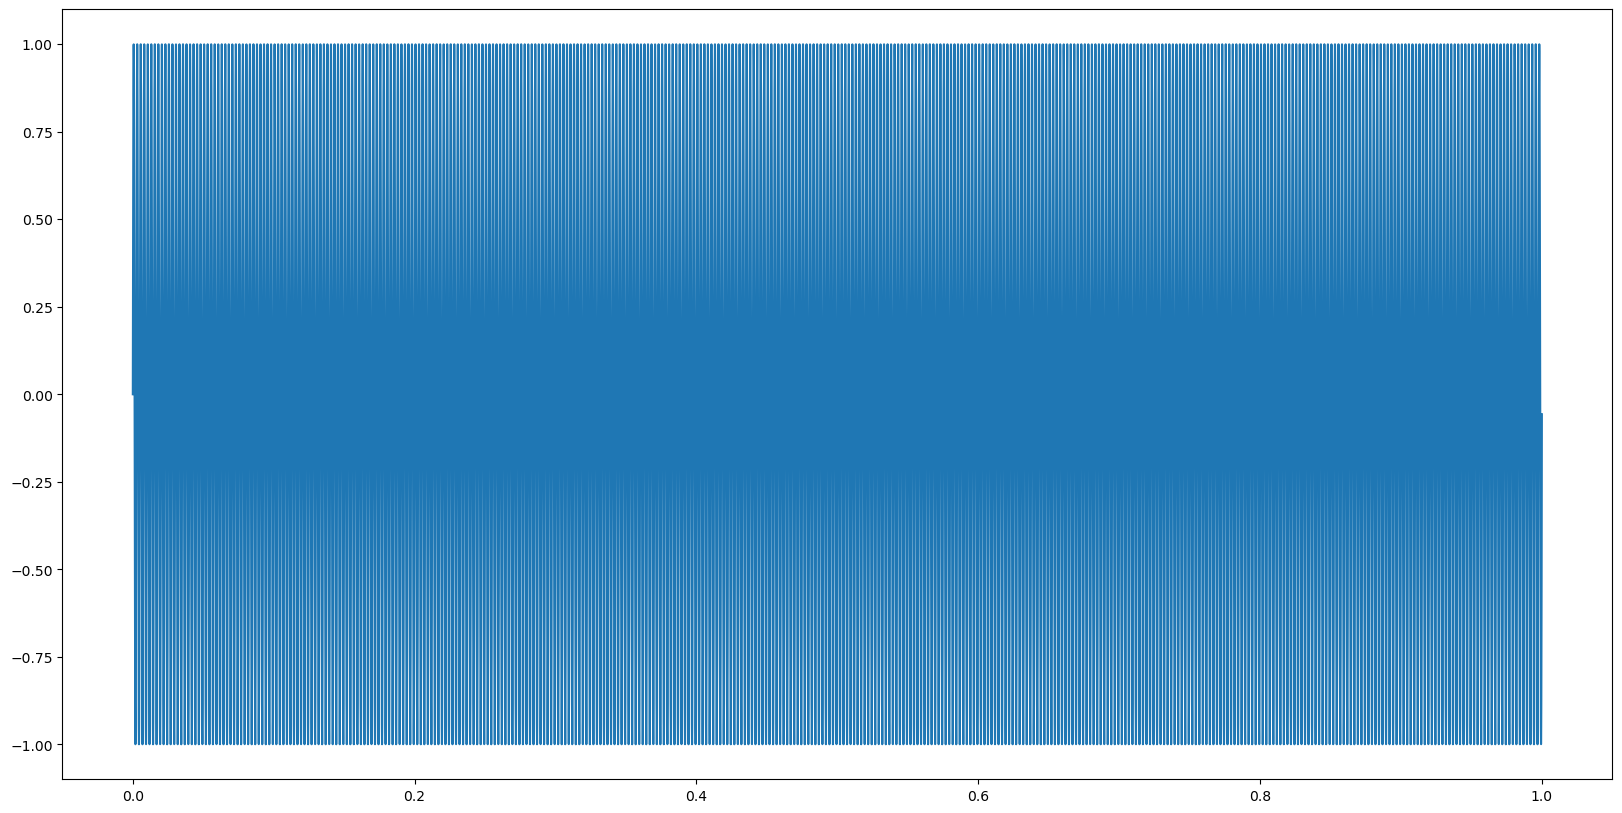

In [9]:
sr = 44100
freq = 400
length = 1
t = np.arange(0, length, 1.0/sr) 
signal = np.sin(np.pi*2*freq*t)
plt.figure(figsize=(20, 10))
plt.plot(t, signal)
plt.show()
wavfile.write("file2.wav", sr, signal)

#### b. Modifikasi kode bagian (b) dengan mengganti nilai amplitudo menjadi 50. Pada output gelombang, berapakah panjang dan tinggi gelombang sekarang? Apakah terdapat perbedaan bunyi dengan hasil suara dari kode bagian (b)? jelaskan alasannya.

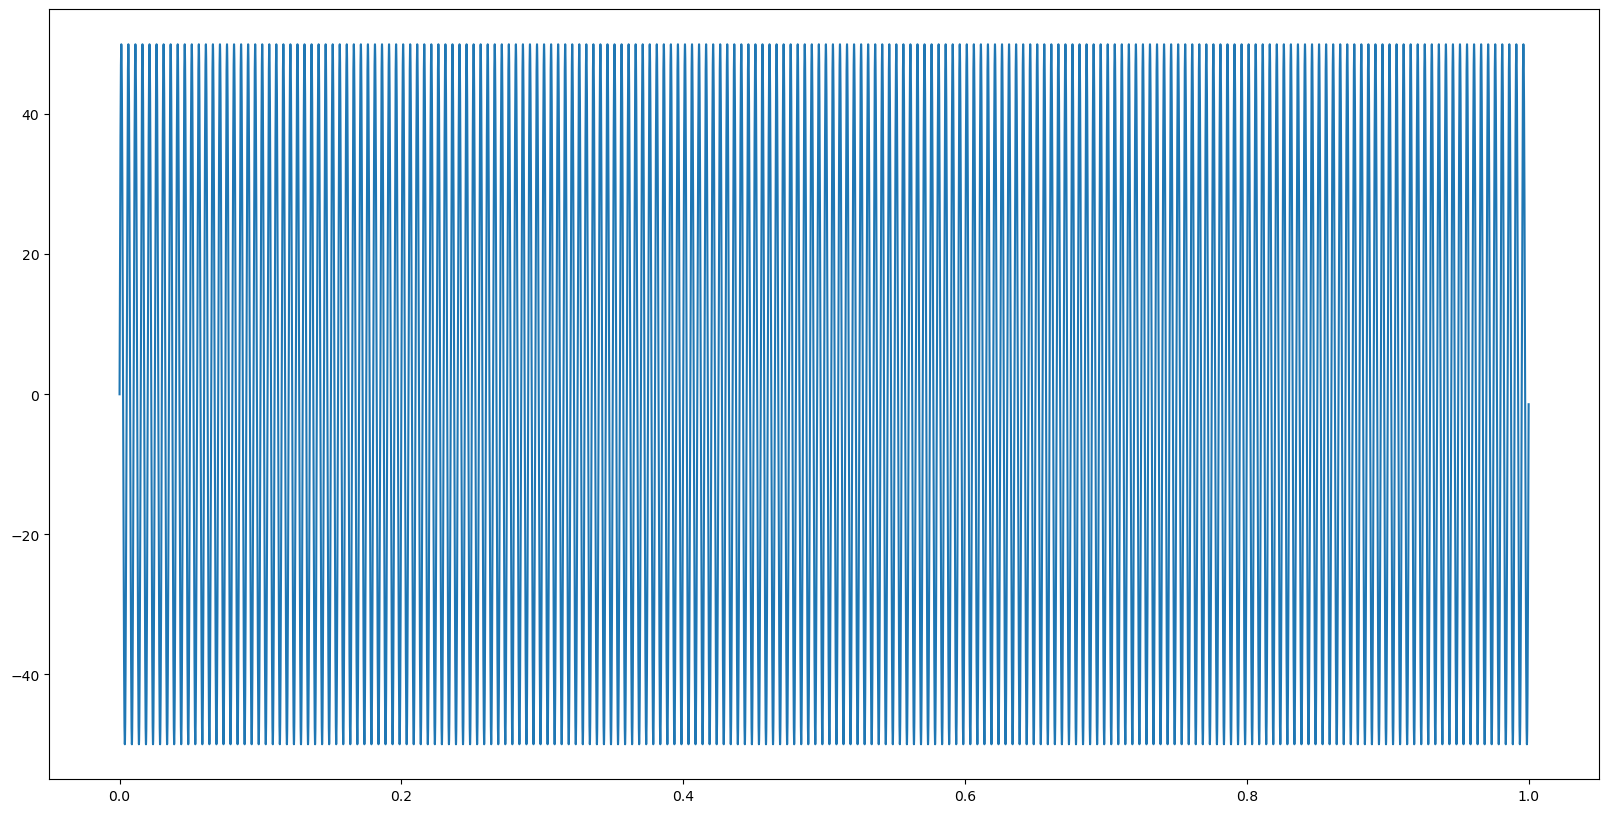

In [21]:
freq = 200
amplitude = 50
signal = amplitude * np.sin(np.pi*2*freq*t)
plt.figure(figsize=(20, 10))
plt.plot(t, signal)
plt.show()
wavfile.write("file4.wav", sr, signal)

In [10]:
char = 'A'
print(ord(char))

65


In [11]:
ascii = 65
print(chr(ascii))

A


In [6]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

print("\nOne-Hot Encoding")
docs = "the bird and the bee"

# memisah kalimat menjadi token
split_docs = docs.split(" ")
data = [doc.split(" ") for doc in split_docs]
values = array(data).ravel()

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)



One-Hot Encoding
[3 2 0 3 1]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

print("\ncountVectorizer")
text = ["everybody love nlp", "nlp is so cool", 
"nlp is all about helping machines process language", 
"this tutorial is on basic nlp technique"]

vectorizer = CountVectorizer()

# tokenisasi dan membuat vocab
vectorizer.fit(text)
print(vectorizer.vocabulary_)


# encode dokumen
vector = vectorizer.transform(text)

# hasil encode vektor
print(vector.shape) 
print()
print(vector.toarray())


countVectorizer
{'everybody': 4, 'love': 8, 'nlp': 10, 'is': 6, 'so': 13, 'cool': 3, 'all': 1, 'about': 0, 'helping': 5, 'machines': 9, 'process': 12, 'language': 7, 'this': 15, 'tutorial': 16, 'on': 11, 'basic': 2, 'technique': 14}
(4, 17)

[[0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
 [1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1]]


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("\nTF-IDF")
text1 = ['i love nlp', "nlp is so cool", 
"nlp is all about helping machines process language", 
"this tutorial is on basic nlp technique"]

tf = TfidfVectorizer()
txt_fitted = tf.fit(text1)
txt_transformed = txt_fitted.transform(text1)

idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names_out(), idf)))


TF-IDF
{'about': 1.916290731874155, 'all': 1.916290731874155, 'basic': 1.916290731874155, 'cool': 1.916290731874155, 'helping': 1.916290731874155, 'is': 1.2231435513142097, 'language': 1.916290731874155, 'love': 1.916290731874155, 'machines': 1.916290731874155, 'nlp': 1.0, 'on': 1.916290731874155, 'process': 1.916290731874155, 'so': 1.916290731874155, 'technique': 1.916290731874155, 'this': 1.916290731874155, 'tutorial': 1.916290731874155}


In [4]:
text = 'datA mining'
ASCIIs = {}
for char in text:
    ASCIIs[char] = ord(char)

print(ASCIIs)

{'d': 100, 'a': 97, 't': 116, 'A': 65, ' ': 32, 'm': 109, 'i': 105, 'n': 110, 'g': 103}


In [9]:
docs = "the bird and the bee" # Kalimat yang akan di-encode

# memisah kalimat menjadi token
split_docs = docs.split(" ")
data = [doc.split(" ") for doc in split_docs]
values = array(data).ravel()

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print("\nOne-Hot Encoding:")
print(onehot_encoded)

# Inverse encode
integers_onehot = np.argmax(onehot_encoded, axis=1)
decoded_words = label_encoder.inverse_transform(integers_onehot)
print("\nReverse One-Hot Encoding:")
print(decoded_words)



One-Hot Encoding:
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

Reverse One-Hot Encoding:
['the' 'bird' 'and' 'the' 'bee']
